In [71]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import csv

In [49]:
file = pd.read_csv("features_class_csv/kyoto_class_feat_copy.csv").set_index("Date")
del file["Unnamed: 0"]



Index(['Description', 'Avg_temp_1', 'Avg_temp_2', 'Avg_temp_3', 'Avg_temp_4',
       'Avg_temp_5', 'Avg_temp_6', 'Avg_temp_7', 'Avg_temp_8', 'Avg_temp_9',
       ...
       'Clouds_63', 'Clouds_64', 'Clouds_65', 'Clouds_66', 'Clouds_67',
       'Clouds_68', 'Clouds_69', 'Clouds_70', 'Clouds_71', 'Clouds_72'],
      dtype='object', length=361)


In [51]:
X = file.loc[:, file.columns != 'Description']
y = file['Description']

In [52]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [65]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
import pickle
with open('log_reg_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)

In [55]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7832361068467916
Testing Data Score: 0.7347455675800139


In [56]:
pd.DataFrame({"Prediction": classifier.predict(X_test), "Actual": y_test}).reset_index(drop=True).head()

,Prediction,Actual
0,Clouds,Clouds
1,Clouds,Clouds
2,Clouds,Rain
3,Clear,Clouds
4,Rain,Rain


In [57]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8194796223808427

In [58]:
import pickle
with open('rf_class_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [59]:
pd.DataFrame({"Prediction": rf.predict(X_test), "Actual": y_test}).reset_index(drop=True).head()

,Prediction,Actual
0,Clouds,Clouds
1,Clouds,Clouds
2,Clouds,Rain
3,Clear,Clouds
4,Clouds,Rain


k: 1, Train/Test Score: 1.000/0.818
k: 3, Train/Test Score: 0.938/0.812
k: 5, Train/Test Score: 0.879/0.780
k: 7, Train/Test Score: 0.842/0.761
k: 9, Train/Test Score: 0.814/0.748
k: 11, Train/Test Score: 0.795/0.738
k: 13, Train/Test Score: 0.782/0.736
k: 15, Train/Test Score: 0.769/0.731
k: 17, Train/Test Score: 0.763/0.725
k: 19, Train/Test Score: 0.756/0.720


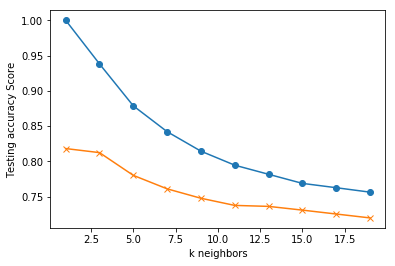

In [60]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [61]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.818


In [73]:
import pickle
with open('knn_class_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [62]:
pd.DataFrame({"Prediction": knn.predict(X_test), "Actual": y_test}).reset_index(drop=True).head()

,Prediction,Actual
0,Clouds,Clouds
1,Clouds,Clouds
2,Rain,Rain
3,Clear,Clouds
4,Rain,Rain


In [63]:
# SVC
# Support vector machine linear classifier

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [64]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.747


In [74]:
import pickle
with open('svc_class_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [42]:
# Calculate classification report
from sklearn.metrics import classification_report
target_names = ["Clear","Clouds","Fog","Haze","Mist","Rain","Snow","Thunderstorm"]
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

       Clear       0.80      0.81      0.80       757
      Clouds       0.79      0.87      0.83      2591
         Fog       0.00      0.00      0.00         1
        Haze       0.00      0.00      0.00        22
        Mist       0.70      0.55      0.62       954
        Rain       0.00      0.00      0.00        28
        Snow       0.00      0.00      0.00         7

 avg / total       0.76      0.78      0.77      4360



/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 7, does not match size of target_names, 8
  .format(len(labels), len(target_names))
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
pd.DataFrame({"Prediction": model.predict(X_test), "Actual": y_test}).reset_index(drop=True).head()

,Prediction,Actual
0,Rain,Clouds
1,Clouds,Clouds
2,Clouds,Clouds
3,Clouds,Clouds
4,Clouds,Clouds
